<a href="https://colab.research.google.com/github/JoelAdams001/silver-spoon/blob/master/HW4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from scipy.cluster.vq import kmeans,vq
from scipy.spatial.distance import cdist
import matplotlib.pyplot as plt

##KMeans Clustering

In [0]:
df = pd.read_csv("Admission_Data.csv", index_col=None)
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [0]:
df.info() #Okay the data looks very clean already, I just grabbed this from Kaggle

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
Serial No.           400 non-null int64
GRE Score            400 non-null int64
TOEFL Score          400 non-null int64
University Rating    400 non-null int64
SOP                  400 non-null float64
LOR                  400 non-null float64
CGPA                 400 non-null float64
Research             400 non-null int64
Chance of Admit      400 non-null float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [0]:
X = df[['GRE Score','TOEFL Score']] #Let's cluster the test scores
X.head()

,GRE Score,TOEFL Score
0,337,118
1,324,107
2,316,104
3,322,110
4,314,103


In [0]:
X.info() #Looks good still

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 2 columns):
GRE Score      400 non-null int64
TOEFL Score    400 non-null int64
dtypes: int64(2)
memory usage: 6.3 KB


In [21]:
kmodel = KMeans(3, init='k-means++')
kmodel.fit(X)
c = kmodel.predict(X)
kmodel.labels_

array([0, 0, 1, 0, 1, 0, 1, 1, 2, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 2, 1, 0,
       0, 0, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 0, 1, 2, 2, 2, 1, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 2, 2, 1, 1, 2, 2, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 2, 2, 2, 1, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 2, 2, 2, 2, 2, 2, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 2,
       2, 1, 2, 1, 1, 1, 2, 2, 2, 0, 0, 0, 1, 1, 2, 2, 0, 1, 0, 0, 0, 2,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 2, 2, 1, 2, 1, 1, 0, 0, 2, 1, 2, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 2, 2, 2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 2, 1,
       1, 1, 1, 1, 0, 0, 2, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 2, 2, 1, 1, 1, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 2, 2, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 1, 2, 2, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 2, 2, 1, 1, 1, 1, 0, 0, 1, 1,

Text(0, 0.5, 'TOEFL Score')

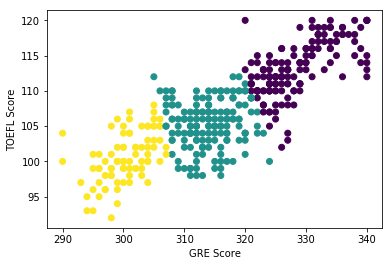

In [23]:
plt.scatter(X['GRE Score'], X['TOEFL Score'], c=kmodel.labels_, cmap='viridis')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')

Text(0, 0.5, 'TOEFL Score')

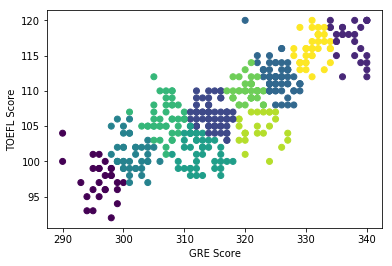

In [24]:
#Hmm, let's try 10 clusters
kmodel = KMeans(10, init='k-means++')
kmodel.fit(X)
c = kmodel.predict(X)
plt.scatter(X['GRE Score'], X['TOEFL Score'], c=kmodel.labels_, cmap='viridis')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')

Text(0, 0.5, 'TOEFL Score')

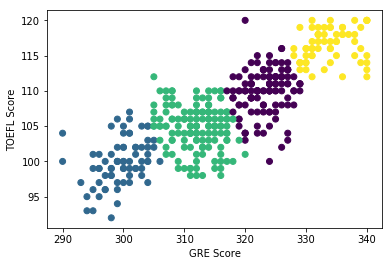

In [27]:
#That doesn't make much sense, I'm going to try 4
kmodel = KMeans(4, init='k-means++')
kmodel.fit(X)
c = kmodel.predict(X)
plt.scatter(X['GRE Score'], X['TOEFL Score'], c=kmodel.labels_, cmap='viridis')
plt.xlabel('GRE Score')
plt.ylabel('TOEFL Score')

In [0]:
#That actually makes some sense, a group of poor performers, moderately poor, average and best performers.

##Random Forests